# Estadística Descriptiva

# Introducción

La estadística se refiere a las técnicas matemáticas que solemos utilizar para describir datos. A menudo, somos capaces de obtener o generar datos, pero puede que no sepamos realmente cómo describirlos para comenzar a generar hipótesis.

Cabe mencionar, que si tenemos un cojunto muy pequeño de datos las técnicas estadísticas pueden salir sobrando pero, la estadística comienza a cobrar importancia cuando tenemos grandes conjuntos (de cientos, miles o millones de registros), que será el caso en el que estaremos en la gran mayoría de los problemas que intentemos resolver.

# Cargando nuestros módulos

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from scipy import stats

In [2]:
# Cargando nuestro dataset
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Análisis rápido y básico con describe

`.describe()` es un método que permite hacer un análisis muy básico pero esencial de un conjunto de datos dispuesto en un dataframe. Cabe mencionar que solo surte efecto sobre las columnas numéricas en el dataset.
Nos sirve para obtener un vistazo a:
- El conteo de valores por cada columna numérica para corroborar que todas tengan la misma longitud o si existen valores perdidos en alguna de ellas.
- La media aritmética de dichas columnas.
- La desviación estándar de dichas columnas.
- El valor mínimo y el valor máximo.
- Los valores para los percentiles 25, 50 y 75 (Rango intercuartil o IQR)

In [6]:
df_tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# Métricas de tendencia central

Artículo original en este [link](https://dfrieds.com/math/mean-median-mode.html)

Vamos a obtener el dataset ***tips*** de la librería ***seaborn*** y la asignaremos a un data frame llamado ***df_tips***

In [3]:
df_tips = sns.load_dataset('tips')
df_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Cada fila representa un único platillo en un restaurante para un conjunto de personas; el dataset contiene los siguiente campos:

| Nombre de la columna | Descripción |
| --- | --- |
| `total_bill` | Total monetario de la comida en USD |
| `tip` | Total monetario de la propina en USD |
| `sex` | Género del camarero |
| `smoker` | Booleano que representa si el comensal fuma o no |
| `day` | Día de la semana |
| `time` | Nombre de la comida (Lunch o Dinner) |
| `size` | Cantidad de personas que comieron esa comida |

## Visualizando la distribución de nuestros datos con histograma

Primero que nada, queremos visualizar la distribución de los datos en un campo. Lo siguiente, es un histograma para ilistrar la distribución de los valores en la columan ***total_bill***. El eje de las x indica los totales de las cuentas y el eje de las y, indica la frecuencia (el conteo pues) de las ocurrencias de esos totales de las cuentas.

A ojo de buen cubero, podemos observar que los valores más frecuentes están entre los 12 y los 20 USD. Es decir, hay más cuentas cuyos totales oscilan entre esos valores que del resto de valores en la columna.

También se puede observar el rango de valores que se extiende hasta cuentas de 50 USD.

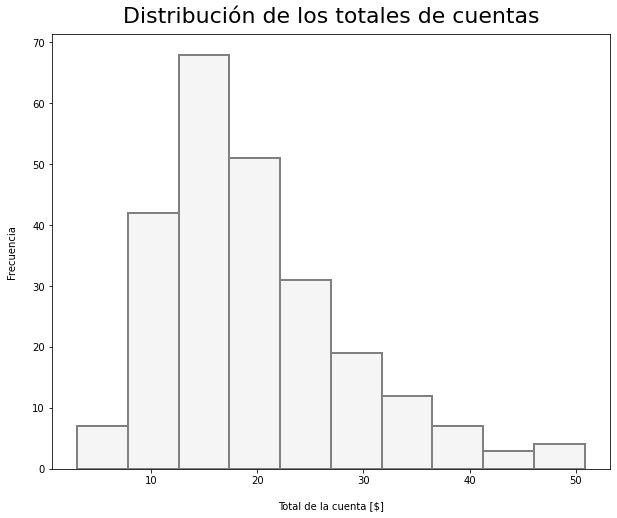

In [5]:
df_tips['total_bill'].plot(kind='hist', figsize=(10, 8), linewidth=2, color='whitesmoke', edgecolor='gray')
plt.xlabel("Total de la cuenta [$]", labelpad=15)
plt.ylabel("Frecuencia", labelpad=15)
plt.title("Distribución de los totales de cuentas", y=1.012, fontsize=22);

## Media (promedio)

***Recordemos que...*** la media aritmética, es el promedio de los valores en una columna.

Es una métrica de tendencia central, pero recordemos que es sensible a la presencia de valores atípicos, los cuales pueden moverla a la izquierda o la derecha dependiendo de las distribución en los valores.

In [7]:
# Pandas nos permite calcular la media en un solo paso
mean_total_bill = round(df_tips['total_bill'].mean(), 2)
print('Nuestra media es de', mean_total_bill)

Nuestra media es de 19.79


**Una aclaración importante:** Si queremos calcular la media un conjunto muestra de valores, deberemos entonces sumar solo a los valores implicados y dividir con el tamaño de la muestra.

## Mediana

***Recordemos que...*** dentro de un conjunto de valore ordenado, la mediana es el valor central.

In [8]:
median_total_bill = df_tips['total_bill'].median()
print('La mediana es de', median_total_bill)

La mediana es de 17.795


**Una aclaración importante:** Si queremos calcular la mediana de un conjunto de valores cuyo tamaño sea par, se tomarán los dos valores centrales y se calculará su promedio.

In [9]:
# Ejemplo:
values = [1,1,3,5,9,10]
median = (3 + 5) / 2
print('Mediana calculada:', median)
print('Mediana por método:', np.median(values))

Mediana calculada: 4.0
Mediana por método: 4.0


## Moda

La **moda** es el valor que más se repite en una secuencia de datos.

*Recuerda* que puede ser aplicado tanto a variables numéricas como categóricas, sin embargo, con Numpy solo podemos contabilizar las numéricas, el caso de las categóricas se resuelve con un **histograma**

In [10]:
mode_total_bill = df_tips['total_bill'].mode().iloc[0]
print('Nuestra moda es de', mode_total_bill)

Nuestra moda es de 13.42


Una de las utilidades de conocer la **moda** es que podemos consultar los registros que resultan de buscar ese valor, de esta manera, podemos indagar sobre algún patrón alrededor de los mismo.

***Podemos realizar esto con query***

In [11]:
df_tips.query('total_bill==13.42')

,total_bill,tip,sex,smoker,day,time,size
121,13.42,1.68,Female,No,Thur,Lunch,2
221,13.42,3.48,Female,Yes,Fri,Lunch,2
224,13.42,1.58,Male,Yes,Fri,Lunch,2


## Visualización de métricas de tendencia central

Increíble, hemos calculados las métricas de tendencia central por separado en nuestro dataset. Sin embargo, los números por si solos no nos dicen mucho, siempre es mejor tener un elemento visual para entenderlo

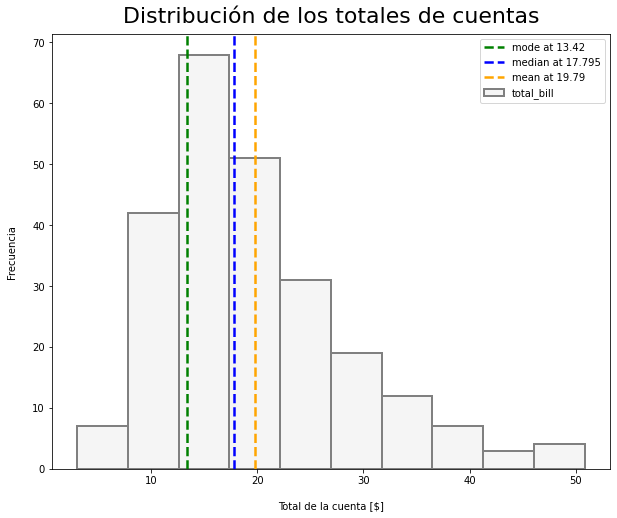

In [35]:
df_tips['total_bill'].plot(kind='hist', figsize=(10, 8), linewidth=2, color='whitesmoke', edgecolor='gray')
plt.xlabel("Total de la cuenta [$]", labelpad=15)
plt.ylabel("Frecuencia", labelpad=15)
plt.title("Distribución de los totales de cuentas", y=1.012, fontsize=22);
measurements = [mode_total_bill, median_total_bill, mean_total_bill]
names = ["mode", "median", "mean"]
colors = ['green', 'blue', 'orange']
for measurement, name, color in zip(measurements, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
plt.legend();

# Métricas de variabilidad y dispersión

In [14]:
# Obtener las la longitud del pétalo de la especie versicolor
versicolor_petal_length = iris[iris['species'] == 'versicolor'].loc[:,'petal_length']

## Rango

In [15]:
vpl_range = max(versicolor_petal_length) - min(versicolor_petal_length)
vpl_range

2.0999999999999996

## Varianza

Una medida más complicada de la dispersión es la varianza, la cual está definida de la siguiente manera:

***La raíz cuadrada de la distancia del dato respecto de la media***

En palabras simples, a mayor varianza, mayor distribución de los datos, pues quiere decir que los valores se extienden sobre la distribución alejándose de la media.

In [16]:
# Arreglo de diferencias respecto de la media: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)
differences.head(10)

50    0.44
51    0.24
52    0.64
53   -0.26
54    0.34
55    0.24
56    0.44
57   -0.96
58    0.34
59   -0.36
Name: petal_length, dtype: float64

In [17]:
diff_sq = differences ** 2
diff_sq.head(10)

50    0.1936
51    0.0576
52    0.4096
53    0.0676
54    0.1156
55    0.0576
56    0.1936
57    0.9216
58    0.1156
59    0.1296
Name: petal_length, dtype: float64

In [18]:
variance_explicit = np.mean(diff_sq)
variance_explicit

0.21640000000000012

Lo anterior fue la representación de lo que hace la función de Numpy np.var

In [19]:
# Podemos calcular la varianza con NumPy: variance_np
variance_np = np.var(versicolor_petal_length)
variance_np

0.21640000000000012

## Desviación estándar

La desviación estándar también es una medida de dispersión. La podemos obtener con **Numpy**:

### Desviación estándar de una única columna

In [32]:
std = np.std(versicolor_petal_length)
print('La desviación estándar es: ', std)

La desviación estándar es:  0.4651881339845204


### Desviación estándar de múltiples columnas

In [31]:
iris.describe().loc['std',:]

sepal_length    0.828066
sepal_width     0.435866
petal_length    1.765298
petal_width     0.762238
Name: std, dtype: float64

## z-score

z-score nos dice a cuántas desviaciones estándar de la media se encuentra cada dato en una distribución. Podemos obtenerlo mediante **stats** de **Scipy**.

### z-score de una única columna

In [22]:
stats.zscore(iris['sepal_length'])

array([-0.90068117, -1.14301691, -1.38535265, -1.50652052, -1.02184904,
       -0.53717756, -1.50652052, -1.02184904, -1.74885626, -1.14301691,
       -0.53717756, -1.26418478, -1.26418478, -1.87002413, -0.05250608,
       -0.17367395, -0.53717756, -0.90068117, -0.17367395, -0.90068117,
       -0.53717756, -0.90068117, -1.50652052, -0.90068117, -1.26418478,
       -1.02184904, -1.02184904, -0.7795133 , -0.7795133 , -1.38535265,
       -1.26418478, -0.53717756, -0.7795133 , -0.41600969, -1.14301691,
       -1.02184904, -0.41600969, -1.14301691, -1.74885626, -0.90068117,
       -1.02184904, -1.62768839, -1.74885626, -1.02184904, -0.90068117,
       -1.26418478, -0.90068117, -1.50652052, -0.65834543, -1.02184904,
        1.40150837,  0.67450115,  1.2803405 , -0.41600969,  0.79566902,
       -0.17367395,  0.55333328, -1.14301691,  0.91683689, -0.7795133 ,
       -1.02184904,  0.06866179,  0.18982966,  0.31099753, -0.29484182,
        1.03800476, -0.29484182, -0.05250608,  0.4321654 , -0.29

### z-score de múltiples columnas

In [28]:
stats.zscore(iris.loc[:,('sepal_length','sepal_width','petal_length','petal_width')])

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

# Métricas de relaciones entre variables

## Covarianza y correlación de Pearson

In [73]:
# Obtener la longitud del pétalo de la especie versicolor
versicolor_petal_length = iris[iris['species'] == 'versicolor'].loc[:,'petal_length']
# Obtener la anchura del pétalo de la especie versicolor
versicolor_petal_width = iris[iris['species'] == 'versicolor'].loc[:,'petal_width']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

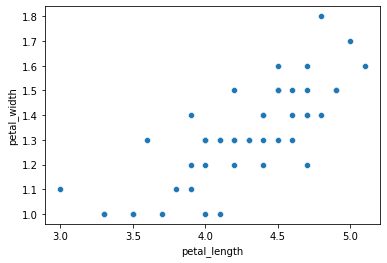

In [74]:
sns.scatterplot(versicolor_petal_length, versicolor_petal_width)

### Covarianza

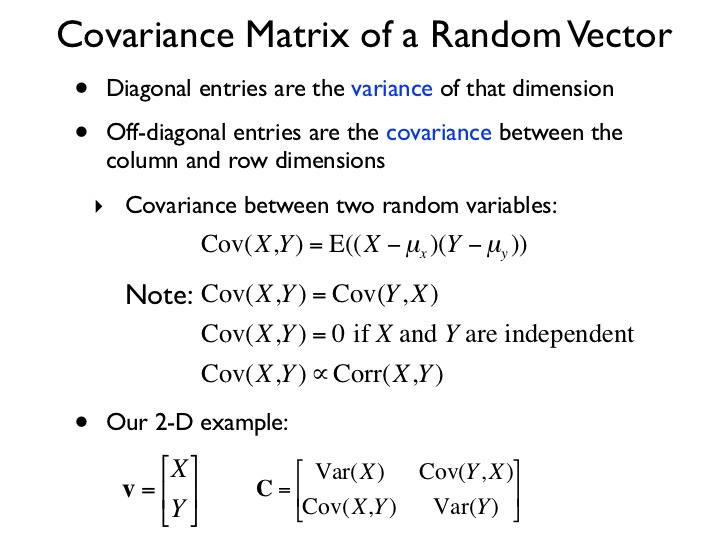

In [78]:
# Calculando la matriz de covarianza: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Imprimir la matriz de covarianza
print(covariance_matrix)

# Extraer la covarianza del largo y ancho de los pétalos: petal_cov
# Documentación: https://numpy.org/doc/stable/reference/generated/numpy.cov.html
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print('La covarianza de versicolor_petal_width con versicolor_petal_length es:', petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
La covarianza de versicolor_petal_width con versicolor_petal_length es: 0.07310204081632653


### Correlación de Pearson

In [11]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Calculando la matriz de correlación: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

0.7866680885228169


## Intervalos de confianza

In [79]:
# Definimos unos datos de prueba
data = [12, 12, 13, 13, 15, 16, 17, 22, 23, 25, 26, 27, 28, 28, 29]

### Intervalos de confianza utilizando la distribución t

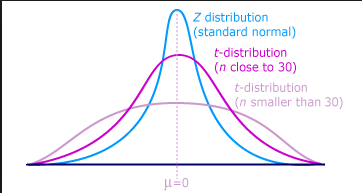

[Explicacion de las distribuciones Z y T](https://medium.com/statistical-guess/t-interval-t-statistics-f45590e1367d)

In [5]:
# Calculamos el intervalo de confianza del 95% para la media de la estatura de la población
# La función stats.sem es utilizada para calcular el error estándar de la media de los
# datos ingresados.
stats.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=stats.sem(data)) 

(16.75776979778498, 24.042230202215016)

In [6]:
# Calculamos el intervalor de confianza 99% para la misma muestra
stats.t.interval(alpha=0.99, df=len(data)-1, loc=np.mean(data), scale=stats.sem(data)) 

(15.3447902793728, 25.455209720627195)

### Intervalos de confianza en una distribución normal

In [ ]:
# Definimos otros datos de prueba
np.random.seed(0)
data = np.random.randint(10, 30, 50)

In [ ]:
# Calculamos el intervalo de confianza del 95% para la media de la población
# La función stats.sem es utilizada para calcular el error estándar de la media de los
# datos ingresados.
stats.norm.interval(alpha=0.95, loc=np.mean(data), scale=stats.sem(data))

In [ ]:
# Calculamos el intervalor de confianza 99% para la misma muestra
stats.norm.interval(alpha=0.99, loc=np.mean(data), scale=stats.sem(data))

# Métricas sobre distribuciones

## Percentiles

Los percentiles son una forma de obtener el valor que corresponde a un cierto porcentaje de los datos ordenados en una distribución, de tal manera que no importa si la distribución es asimétrica, el percentil nos permite hacer el "corte" en la posición porcentual que requerimos.

La mediana, puede considerarse un "nombre especial" para el percentil 50, esto significa que el valor de la mediante siempre es mayor que el 50% de los datos ordenados.

Lo mismo se puede decir de cualquier otro percentil, es decir, si calculas el percentil 25, eso quiere decir que acabas de encontrar un valor en los datos que es mayor que el 25% de los datos ordenados.

In [5]:
# Vamos a utilizar nuevamente el dataset 'iris'
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [51]:
# Especifica qué percentiles deseas obtener
percentiles = np.array([25, 50, 75])

# Obtenemos los datos para el 
versicolor_petal_length = iris.query('species=="versicolor"').loc[:,'petal_length']

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

[4.   4.35 4.6 ]


### Visualizando percentiles mediante histograma

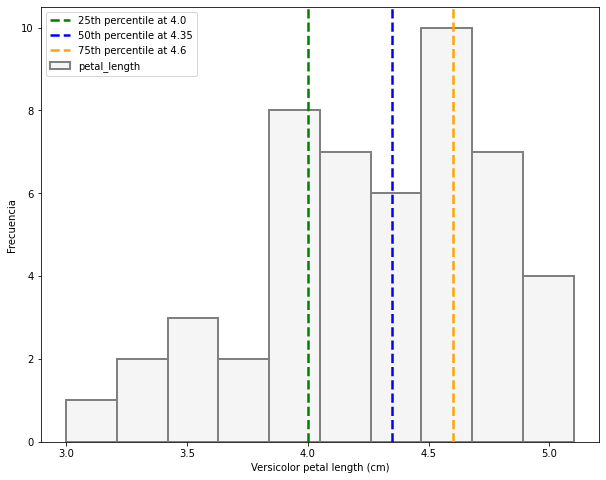

In [53]:
# Plot the ECDF
_ = versicolor_petal_length.plot(kind='hist', figsize=(10, 8), linewidth=2, color='whitesmoke', edgecolor='gray')
_ = plt.xlabel('Versicolor petal length (cm)')
_ = plt.ylabel('Frecuencia')

names = ['25th percentile', '50th percentile', '75th percentile']
colors = ['green', 'blue', 'orange']
for measurement, name, color in zip(ptiles_vers, names, colors):
    plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)

plt.legend()

Vamos a corroborar con un boxplot

<AxesSubplot:ylabel='petal_length'>

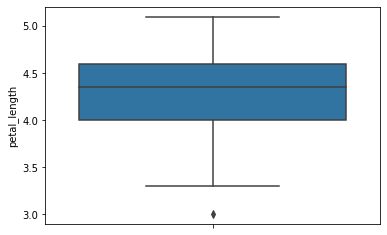

In [55]:
sns.boxplot( y=versicolor_petal_length )

## Outliers (valores atípicos)

Cuando miramos un histograma es muy fácil identificar los valores más comunes en la distribución, pero los outliers no siempre quedan a la vista.

Antes de continuar, siempre es buena idea revisar si tenemos valores atípicos, los cuales son valores extremos que bien pueden ser errores en los registros, o quizá sean reportes precisos de eventos atípicos.

Podemos identificar outliers muy fácilmente con gráficas de caja

La mejor manera de darle manejo a los datos atípicos

### Hallar outliers con boxplots

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

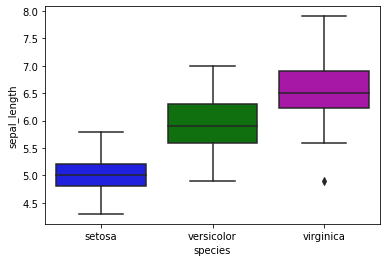

In [57]:
my_pal = {"versicolor": "g", "setosa": "b", "virginica":"m"}
sns.boxplot( x=iris["species"], y=iris["sepal_length"], palette=my_pal)

### Hallar outliers con z-score

In [63]:
data = iris.query('species=="virginica"').loc[:,'sepal_length']
mean = np.mean(data)
std = np.std(data)
print('Media de longitud del sépalo para la especie Virginica: ', mean)
print('Desviación estándar: ', std)

Media de longitud del sépalo para la especie Virginica:  6.587999999999998
Desviación estándar:  0.6294886813914925


In [72]:
threshold = 2.5
outlier = []
for i in data:
    z = (i-mean)/std
    if z > threshold or z < -threshold:
        outlier.append(i)
print('', outlier)

 [4.9]
